# Restaurant Quest using TomTom API<a id='top'></a>
Full story | **Updated on**: 14 Jan 2020 | **Author**: [Xinrong Ding](https://www.linkedin.com/in/xding/)

### Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Introduction: The Challenge](#1)<br>
1.1. [A Cooperative Iterative Approach](#11)<br>
1.2. [About Amsterdam](#12)<br>
1.3. [Business Questions](#13)<br>
2. [Data Requirements](#2)<br>
2.1. [Data of Surroundings](#21)<br>
2.2. [Demographic Data](#22)<br>
3. [Analyze Demographic Data](#3)<br>
3.1. [Load Data to a Dataframe](#31)<br>
3.2. [Drop Unnecessary Data](#32)<br>
3.3. [Observe Data using a Bar Chart](#33)<br>
3.4. [Remove Neighborhoods that have below average population density](#34)<br>
3.5. [Neighborhoods that Have More One-person Households](#35)<br>
3.6. [View Candidate Neighborhoods on a Map](#36)<br>
3.7. [Conclusion of Demographic Data Analysis](#37)<br>
4. [Explore the Surroundings](#4)<br>
4.1. [Define Foursquare Credentials and Version](#41)<br>
4.2. [Show Chinese Restaurants in Candidate Neighborhoods on the Map](#42)<br>
4.3. [In-depth Analysis of One Neighborhood - Oude Pijp](#43)<br>
5. [Conclusion and Future Work](#5)<br>

</div>

<br>
<hr style="border: 1px solid orange;">

<a id="1"></a>
# 1. Introduction: The Challenge
[Back to top](#top)

A good friend of mine, Linda, whose dream is to open a Chinese restaurant one day to share the joy of good food with others. Now, everything is ready, she can finally realize her dream. She has chosen Amsterdam to be the place that her dream starts. Not only because Amsterdam is one of the most populous and visited cities in Europe but also because the diverse culture the city embraces.

My challenge as a data scientist is to help her to find the ideal location in Amsterdam using whatever data I can access.

## 1.1. A Cooperative Iterative Approach<a id="11"></a>

It's important to emphasize that even though I might know how to deal with data better, Linda definitely knows food business a lot more. Throughout this project, we will work closely together to take full advantage of our expertise.

The process is also iterative. Not all decisions made at the beginning of the project remains the best ones. We both fully understand that when we learn more about Amsterdam and the its residences, we need to continuously re-examine and fine tune our decisions.

## 1.2. About Amsterdam<a id="12"></a>

[Amsterdam](https://en.wikipedia.org/wiki/Amsterdam) is the capital city and most populous municipality of [the Netherlands](https://en.wikipedia.org/wiki/Netherlands). 
Here are some facts about its residences:

* Amsterdam has a population of **854,047** within the city proper
* Amsterdam city proper has **4,457** inhabitants per square kilometer and **2,275** households per square kilometer.
* Amsterdam has more than **100 kilometers (60 miles)** of canals, most of which are navigable by boat.

As to tourism, Amsterdam is one of the most popular tourist destinations in Europe
* Number of international tourists per year: **20.63 million**.
* Out of which, the number of day-trippers is: **16 million**.

_Reference: https://en.wikipedia.org/wiki/Amsterdam_

## 1.3. Business Questions<a id="13"></a>

To find the ideal location for the restaurant, we must first seek answers to a few questions.

### Question 1: How many restaurants already exist?

If this new restaurant would be the only one in a neighborhood, there will be more profit for Linda. So, the number of existing  restaurants in the neighborhood must be taken into consideration.
Again, this question can be answered, hopefully, by using Foursquare API.

### Question 2: How popular will Chinese food be in the neighborhood?

For Linda, it's important to serve traditional Chinese food the way she knows. Even though Chinese food is widely loved, it makes sense to double check how existing Chinese restaurants (or Asian restaurants) are perceived.
This question can be answered, hopefully, by using Foursquare API.

### Question 3: Who are the target customers and where do they live?

It is going to be a small restaurant (5 to 7 tables) due to the limited investment. The primary income would be takeout and orders made online.
From past experience, Linda knows that people who live alone are more likely to buy takeout or use online food ordering apps such as Uber Eats. They are the ideal target customers for her new restaurant. So, we will look for an area with a relatively high density of one-person household.
We need demographic information to answer this question.

<br>
<hr style="border: 1px solid orange;">

# 2. Data Requirements<a id="2"></a>
[Back to top](#top)

We have the big question, where to 
open a Chinese restaurant in Amsterdam. Now, we need to collect data that can help us answer the questions. We need to collect data from at least two sources:

* Data of the surroundings (density of similar restaurants nearby)
* Demographic data (per area in Amsterdam)

## 2.1. Data of Surroundings<a id="21"></a>
[Back to top](#top)

[**Foursquare API**](https://developer.foursquare.com/docs/api/endpoints), or **Google API**.

#### Foursquare API Endpoints that we need:

* [**Search**](https://developer.foursquare.com/docs/api/venues/search): Returns a list of venues near the current location, optionally matching a search term.
* [**Category ID**](https://developer.foursquare.com/docs/resources/categories): Crucial information to accurately query for one specific type of places.
* [**Trending**](https://developer.foursquare.com/docs/api/venues/trending): Returns a list of venues near the current location with the most people currently checked in.

#### Information isn't available for a free account
* **Number of Likes**: Assumption: the more voting, the more the restaurant is visited. It can be used to see how often<br>
_Unfortunately, this information needs a premium account._

## 2.2 Demographic Data<a id="22"></a>
[Back to top](#top)

In order to know which neighborhoods are more interesting to investigate further, we need to look into demographic data to pick the neighborhoods that have more target customers in terms of quantity and density.

The Central Bureau of Statistics of the Netherlands, **CBS** in short, provides a large number of demographic data regarding who live and work in the Netherlands.<br>
In [this page](https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84286NED/table?ts=1558337871247), you can choose whatever feature you need to solve the problem. The list of features is quite comprehensive. It is important, therefore, to define exactly what the data can be used.


#### Features that can be used to answer the question

* **Regional specifics** _(Regioaanduiding)_: This information can help me to link relative details to a specific area.
* **Total Households** _(Particulier huishouden)_: Number of households in a neighborhood.
* **One-person Households** _(Eenpersoonshuishoudens)_: Number of the households that with only one person.
* **Population density** _(Bevolkingsdichtheid)_: A more densely populated area means more customers for a restaurant. The unit of population density is **number of people per square kilometer**.

#### Information that isn't available

* **Origin of birth** _(Personen met een migratieachtergrond)_: This information can help us to determine the types of food the restaurant should offer.
    * Unfortunately, the categorization is not detailed enough. I am not able to single out people come from China in the data.
* **Income per household** _(Inkomen van huishoudens)_: Since restaurants are usually quite expensive comparing to home-cooking. Only people who have sufficient income can afford to go to restaurants often.<Br>
_Unfortunately, this information is missing consistently from the database._

#### Features deliberately excluded

* **Civil status**: Since we can distinguish one-person households, it's not necessary to understand why people live alone (single or divorced does not seem to link to food strategy directly).
* **Gender**: Reason, in the Netherlands, there isn't a big difference between men and women in terms of the likeliness of cooking at home.
* **Type of house**: This has no direct correlation to people's choice of food.

<br>
<hr style="border: 1px solid orange;">

# 3. Analyze Demographic Data<a id="3"></a>
[Back to top](#top)

I selected necessary data from [CBS](https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84286NED/table?ts=1558337871247), as mentioned in [chapter 2.2](#22).<br>
The data is in CSV format.

## 3.1 Load Data to a Dataframe

#### Load necessary libraries

In [1]:
# library to handle data in a vectorized manner
import numpy as np 
# library to load dataframe
import pandas as pd

# Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#### Load the CSV file

In [2]:
df = pd.read_csv('https://dl.dropboxusercontent.com/s/jn66fdiuenopwrl/Amsterdam.csv')
df.head()

,Neighborhood,ID,Total Residences,Total Households,One-person Households,Population Density,Lat,Lon
0,Burgwallen-Oude Zijde,WK036300,4305,3090,2180,12323,52.371946,4.896103
1,Burgwallen-Nieuwe Zijde,WK036301,3930,2835,2000,6881,52.373706,4.889922
2,Grachtengordel-West,WK036302,6385,4110,2570,14261,52.370837,4.885478
3,Grachtengordel-Zuid,WK036303,5350,3410,2140,10303,52.364422,4.894243
4,Nieuwmarkt,WK036304,9765,6485,4285,13741,52.372160,4.900096


In [3]:
df.shape

(65, 8)

#### In total 65 neighborhoods

_There are definitely more neighborhoods in Amsterdam municipality. However, for the sake of this challenge, we decided to focus on the neighborhoods that within or connected to Amsterdam city proper._ 

#### Sort the neighborhoods by the population density

In [4]:
df.sort_values(["Population Density"], axis=0, ascending=False, inplace=True)
df.head()

,Neighborhood,ID,Total Residences,Total Households,One-person Households,Population Density,Lat,Lon
14,Staatsliedenbuurt,WK036314,13315,8105,4860,28139,52.380287,4.870951
19,Van Lennepbuurt,WK036319,6990,4535,3005,28005,52.365144,4.867845
31,Indische Buurt West,WK036331,12640,7060,3930,26985,52.361625,4.938813
21,Overtoomse Sluis,WK036321,7890,4840,2910,26482,52.359468,4.860689
18,Kinkerbuurt,WK036318,6590,3950,2460,26135,52.369167,4.866649


## 3.2. Drop Unnecessary Data
[Back to top](#top)

As we mentioned earlier, we want to learn the population density together with how many households are with only one person. It seems that the total number of residences is not necessary to answer any of the questions. Therefore, we decide to remove it from the data from now on.

In [5]:
df.drop("Total Residences", axis=1, inplace=True)
df.head()

,Neighborhood,ID,Total Households,One-person Households,Population Density,Lat,Lon
14,Staatsliedenbuurt,WK036314,8105,4860,28139,52.380287,4.870951
19,Van Lennepbuurt,WK036319,4535,3005,28005,52.365144,4.867845
31,Indische Buurt West,WK036331,7060,3930,26985,52.361625,4.938813
21,Overtoomse Sluis,WK036321,4840,2910,26482,52.359468,4.860689
18,Kinkerbuurt,WK036318,3950,2460,26135,52.369167,4.866649


## 3.3. Observe Data using a Bar Chart<a id="33"></a>
[Back to top](#top)

In order to better decide what to do with the data, I want to take a good look at the data. Visualizing the data will help a lot. I choose to use a horizontal bar chart, because I want the neighborhood names to be very easy to read. Due to the number of neighborhoods (65), the vertical bar might not offer enough room to show all the bars.

In [6]:
# step 1: Extract only necessary data
df_visualize = df[["Neighborhood", "Total Households", "One-person Households", "Population Density"]]
df_visualize.head()

,Neighborhood,Total Households,One-person Households,Population Density
14,Staatsliedenbuurt,8105,4860,28139
19,Van Lennepbuurt,4535,3005,28005
31,Indische Buurt West,7060,3930,26985
21,Overtoomse Sluis,4840,2910,26482
18,Kinkerbuurt,3950,2460,26135


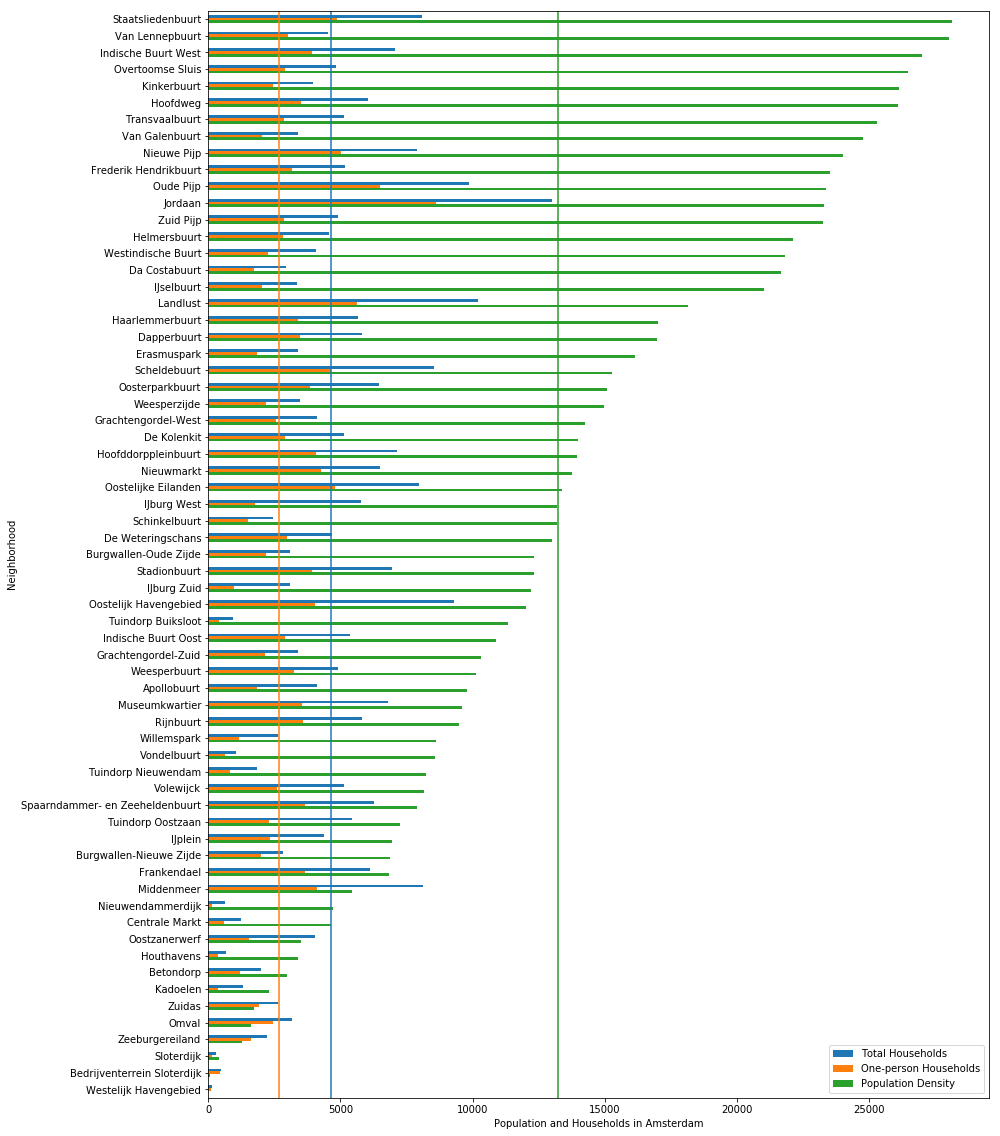

In [7]:
ax = df_visualize.plot(kind='barh', figsize=(14,20))
#ax.set_title('Population and Households in Amsterdam')
ax.set_xlabel('Population and Households in Amsterdam')
ax.set_ylabel('Neighborhood')
ax.invert_yaxis()
ax.set_yticklabels(df['Neighborhood'].values)

rects = ax.patches

# use axvline to mark the average population density
mean = df["Population Density"].mean()
ax.axvline(mean, color='#2B9B2A') #Green

# use axvline to mark the average total households
mean2 = df["Total Households"].mean()
ax.axvline(mean2, color='#1E77B4') #Blue

# use axvline to mark the average one-person households
mean3 = df["One-person Households"].mean()
ax.axvline(mean3, color='#FF7F0F') #Orange

### 3.3.1. Learnings from the Above Bar Chart<a id="331"></a>
[Back to top](#top)

1. One thing becomes evident is that many neighborhoods in Amsterdam has much lower population density than the average value. These neighborhoods are very unlikely to be ideal location to open the restaurant. Therefore, we should remove them to focus on the neighborhoods that are more densely populated. We will do that in the [next chapter](#34).
2. The second learning is that amongst the more densely populated neighborhoods, not all of them have above average total number of households and one-person households.We will do further analysis in [chapter 3.5](#35) to filter out the neighborhoods that do not have enough one-person households.

## 3.4. Remove Neighborhoods that have below average population density<a id="34"></a>
[Back to top](#top)

In [8]:
#First calculate the average residences of each neighborhood
average_density = int(df["Population Density"].mean())
print("Average population density of Amsterdam city proper is: ", average_density)

Average population density of Amsterdam city proper is:  13233


In [9]:
#Drop all neighborhoods that has a Total Households number below average
#result[result['Value'] ! <= 10]  
df = df[df["Population Density"] > average_density]
df.head()

,Neighborhood,ID,Total Households,One-person Households,Population Density,Lat,Lon
14,Staatsliedenbuurt,WK036314,8105,4860,28139,52.380287,4.870951
19,Van Lennepbuurt,WK036319,4535,3005,28005,52.365144,4.867845
31,Indische Buurt West,WK036331,7060,3930,26985,52.361625,4.938813
21,Overtoomse Sluis,WK036321,4840,2910,26482,52.359468,4.860689
18,Kinkerbuurt,WK036318,3950,2460,26135,52.369167,4.866649


In [10]:
print("Number of neighborhoods that has higher than average population density: ", df.shape[0])

Number of neighborhoods that has higher than average population density:  29


## 3.5. Neighborhoods that Have More One-person Households<a id="35"></a>
[Back to top](#top)

In [11]:
#calculate the percentage of one-person households of every neighborhood
df["Percentage of One-person Households"] = round(df["One-person Households"] / df["Total Households"]*10000)/100
df.head()

,Neighborhood,ID,Total Households,One-person Households,Population Density,Lat,Lon,Percentage of One-person Households
14,Staatsliedenbuurt,WK036314,8105,4860,28139,52.380287,4.870951,59.96
19,Van Lennepbuurt,WK036319,4535,3005,28005,52.365144,4.867845,66.26
31,Indische Buurt West,WK036331,7060,3930,26985,52.361625,4.938813,55.67
21,Overtoomse Sluis,WK036321,4840,2910,26482,52.359468,4.860689,60.12
18,Kinkerbuurt,WK036318,3950,2460,26135,52.369167,4.866649,62.28


In [12]:
#sorting data frame by Percentage of One-person Households
df.sort_values(["Percentage of One-person Households"], axis=0, ascending=False, inplace=True) 
df.head()

,Neighborhood,ID,Total Households,One-person Households,Population Density,Lat,Lon,Percentage of One-person Households
6,Jordaan,WK036306,12985,8625,23289,52.374500,4.879491,66.42
19,Van Lennepbuurt,WK036319,4535,3005,28005,52.365144,4.867845,66.26
4,Nieuwmarkt,WK036304,6485,4285,13741,52.372160,4.900096,66.08
24,Oude Pijp,WK036324,9875,6510,23353,52.355216,4.894574,65.92
25,Nieuwe Pijp,WK036325,7905,5015,23998,52.351856,4.897728,63.44


In [13]:
# step 1: Extract only necessary data
# oph stands for One-person Households
df_oph = df[["Neighborhood", "Percentage of One-person Households"]]
df_oph.head()

,Neighborhood,Percentage of One-person Households
6,Jordaan,66.42
19,Van Lennepbuurt,66.26
4,Nieuwmarkt,66.08
24,Oude Pijp,65.92
25,Nieuwe Pijp,63.44


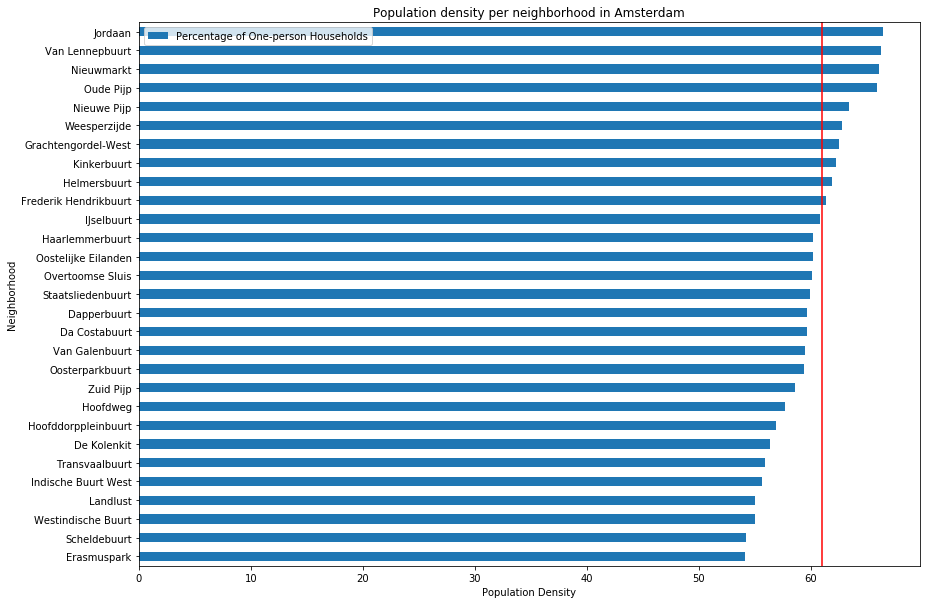

In [14]:
# step 2: plot data
ax = df_oph.plot(kind='barh', figsize=(14,10))
ax.set_title('Population density per neighborhood in Amsterdam')
ax.set_xlabel('Population Density')
ax.set_ylabel('Neighborhood')
ax.invert_yaxis()
ax.set_yticklabels(df_oph['Neighborhood'].values)

rects = ax.patches

ax.axvline(61, color='r')

### 3.5.1. Learnings from the Above Bar Chart<a id='351'></a>
[Back to top](#top)

As mentioned after we examine the data in a bar chart ([chapter 3.3.1](#331)). It seems that the percentage of one-person households (in comparison to the total number of households) seems to be rather consistent for the neighborhoods that have above average population density.

Now, in the above bar chart, the consistency becomes quite clear.

However, we observe there are roughly 3 ranges of the percentage:

1. High: 66% ~ 67%. The first four neighborhood
2. Medium: 59% ~ 63.5%. 
3. Low: 53% ~ 59%. The last 10 neighborhood

We decided to focus on the **top 10**, the neighborhoods that have **over 61 percent of one-person households** (Marked by the red line in the above bar chart).

In [15]:
df = df[df["Percentage of One-person Households"] > 61.0]
df.shape

(10, 8)

## 3.6. View Candidate Neighborhoods on a Map<a id="36"></a>
[Back to top](#top)

In [16]:
#!conda install -c conda-forge folium=0.5.0 --yes #install folium
import folium # map rendering library

In [17]:
import requests
tomtom_api_keys = ["qTI9oA80m7X6TeWf4qKDjA2UvCy6p5mA"] # max 2500 calls/day
api_key = tomtom_api_keys[0]

In [18]:
# Search for city: 
def SearchCity(api_key,City,Country):
    
    url = 'https://api.tomtom.com/search/2/search/'
    url += City + ', ' + Country
    url += '.json?limit=1&idxSet=Geo&key=' + api_key
    
    result = requests.get(url).json()
    
    GeoID = result['results'][0]['dataSources']['geometry']['id']
    position = result['results'][0]['position']
    
    return GeoID,position

In [19]:
Amsterdam_position = SearchCity(api_key, "Amsterdam", "Netherlands")

In [26]:
lat_amsterdam = Amsterdam_position[1]['lat']
lon_amsterdam = Amsterdam_position[1]['lon']
print(lat_amsterdam, lon_amsterdam)

52.37317 4.89066


In [27]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [28]:
address = 'Amsterdam, The Netherlands'

geolocator = Nominatim(user_agent="amsterdam")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam are 52.3727598, 4.8936041.


### 3.6.1. First Impression of the Candidate Neighborhoods
[Back to top](#top)

Visualize one feature (number of one-person households) to get an impression of the 10 candidate neighborhoods.

In [29]:
maps_url = "http://{s}.api.tomtom.com/map/1/tile/"

# layers and styles let you adjust the look and feel of the map. All 3 layers are available in 2 different styles.
layer = "basic" # options: basic / hybrid / labels
style = "main" # options: main / night

# initiate the map
TomTom_map = folium.Map(
    location = [lat_amsterdam, lon_amsterdam], # on what coordinates [lat, lon] we want to initialise our map
    zoom_start = 13, # with what zoom level we want to initialise our map, from 0 to 22
    tiles = str(maps_url + layer + "/" + style + "/" + "{z}/{x}/{y}.png?key=" + api_key),
    attr = 'TomTom')

# add markers to map
for lat, lon, neighborhood, oph in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['One-person Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=oph/25,
        popup=label, 
        color='#FF7F0F', # Orange
        fill=True,
        fill_color='#FF7F0F',
        fill_opacity=0.3).add_to(TomTom_map)

TomTom_map

In [31]:
# create map of Amsterdam using latitude and longitude values
map_amsterdam = folium.Map(location=[lat_amsterdam, lon_amsterdam], tiles='cartodbpositron', zoom_start=13)

# add markers to map
for lat, lon, neighborhood, oph in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['One-person Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=oph/25,
        popup=label, 
        color='#FF7F0F', # Orange
        fill=True,
        fill_color='#FF7F0F',
        fill_opacity=0.3).add_to(map_amsterdam)
    
map_amsterdam

### 3.6.2. Visualize More Features on the Map

The above map gives us an impression of how the numbers of one-person households per neighborhood looks like.

Now let's add three features to the map:

1. **Orange circles** represent the number of one-person households.
2. **Blue circles** represent the number of households in total.
3. **Green circles** represent the population density.

As to the circles:

* The center of the orange, green, and blue circles is the center of the neighborhood. Click the center of the circles to see the name of the neighborhood.
* The radius of each circle represents the number of each feature.

In order to show a more zoomed in map view, we re-adjust the center of the map.

#### Re-adjust the center of the 10 candidate neighborhoods

In [32]:
center_lat = 52.364483
center_lon = 4.88949

#### Draw the Map with One-person Households, Total Households, and Population Density.

In [33]:
# create map of Amsterdam using latitude and longitude values
map_amsterdam = folium.Map(location=[center_lat, center_lon], tiles='cartodbpositron', zoom_start=14)

# add markers that represent one-person households to the map
for lat, lon, neighborhood, oph in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['One-person Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=oph/25,
        popup=label,
        color='#FF7F0F', # Orange
        fill=True,
        fill_color='#FF7F0F', 
        fill_opacity=0.3
    ).add_to(map_amsterdam)

# add markers that represent total households to the map
for lat, lon, neighborhood, households in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['Total Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=households/25,
        popup=label,
        color='#1E77B4', # Blue
        fill=False
    ).add_to(map_amsterdam)
    
# add markers that represent population density to the map
for lat, lon, neighborhood, density in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['Population Density']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=density/100,
        popup=label,
        color='#2A9E2A', # Green
        fill=False
    ).add_to(map_amsterdam)
    
map_amsterdam

### Learnings from the above data visualization

As you can see, when we choose an ideal location to open the Chinese restaurant:
* **The bigger the green circles the better.**
* **The less difference between the size of the blue circles and the orange circles the better.**

## 3.7. Conclusion of Demographic Data Analysis<a id='37'></a>
[Back to top](#top)

Through the above analysis, we have chosen **10** out of **65** neighborhoods in Amsterdam city proper as our candidate neighborhood to investigate further.

In the next chapter we will further analyze the **10** neighborhoods by looking into the number of restaurants and the density of Chinese restaurants to further narrow down to **3 ~ 5** neighborhoods for future analysis.

<br>
<hr style="border: 1px solid orange;">

# 4. Explore the Surroundings<a id='4'></a>
[Back to top](#top)

As mentioned earlier, we are going to use [**Foursquare API**](https://developer.foursquare.com/docs/api/endpoints) to continue our exploration of the remaining **10** candidate neighborhoods.

#### Foursquare API Endpoints that we need:

* [**Search**](https://developer.foursquare.com/docs/api/venues/search): Returns a list of venues near the current location, optionally matching a search term.
* [**Category ID**](https://developer.foursquare.com/docs/resources/categories): Crucial information to accurately query for one specific type of places.
* [**Trending**](https://developer.foursquare.com/docs/api/venues/trending): Returns a list of venues near the current location with the most people currently checked in.

## 4.1. Define Foursquare Credentials and Version<a id='41'></a>
[Back to top](#top)

Get the **Client_ID** and **Client_Secret** from Foursqure [MyApp](https://foursquare.com/developers/apps) to get the credentials.<br>
**Version** is the date when this notebook was created.

In [34]:
CLIENT_ID = 'AHPVRYQIQT4LOYOT0ZEN0OJR24ERX1E5CXPFRKFQ1D44JWJH' # your Foursquare ID
CLIENT_SECRET = 'XJ1ASSSXERK2W5OLNAC00KYF4NZM2SECBZKHHE5GELUXLEG0' # your Foursquare Secret
VERSION = '20190512'
LIMIT = 50 # With a free account the max result one query returns is 50. It is very limiting.
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AHPVRYQIQT4LOYOT0ZEN0OJR24ERX1E5CXPFRKFQ1D44JWJH
CLIENT_SECRET:XJ1ASSSXERK2W5OLNAC00KYF4NZM2SECBZKHHE5GELUXLEG0


#### Load necessary libraries

In [35]:
# library to handle requests
import requests
# transforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

## 4.2. Show Chinese Restaurants in Candidate Neighborhoods on the Map<a id='42'></a>
[Back to top](#top)

One very important criterion when deciding where to open a new Chinese restaurant is, how many existing Chinese restaurants are there already. Therefore, it’s very important for us to see the number and distribution of existing Chinese restaurants in the candidate neighborhoods.

`https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**<br>
`&client_secret=`**CLIENT_SECRET**<br>
`&ll=`**LATITUDE**`,`**LONGITUDE**<br>
`&v=`**VERSION**<br>
`&categoryId=`**[category](https://developer.foursquare.com/docs/resources/categories)**<br>
`&radius=`**RADIUS**<br>
`&limit=`**LIMIT**<br>

Define a query to search for all the restuarants that are within 5 km from the **center of all the 10 candidate neighborhoods**.

In [36]:
category = '4bf58dd8d48988d145941735'# The category ID for Chinese Restaurant.
#search_query = 'Chinese Restaurant' # This won't work, because Foursquare will search 'Chinese' OR 'Restaurant'
search_radius = 2500
print('OK!')

OK!


### 4.2.1. Get Information from Foursquare API and convert it to a Dataframe

#### Define the corresponding URL

In [37]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, center_lat, center_lon, VERSION, category, search_radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=AHPVRYQIQT4LOYOT0ZEN0OJR24ERX1E5CXPFRKFQ1D44JWJH&client_secret=XJ1ASSSXERK2W5OLNAC00KYF4NZM2SECBZKHHE5GELUXLEG0&ll=52.364483,4.88949&v=20190512&categoryId=4bf58dd8d48988d145941735&radius=2500&limit=50'

#### Send the GET Request and examine the results

In [38]:
results = requests.get(url).json()
#results

#### Get relevant part of JSON and transform it into a pandas dataframe

In [39]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# transform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(2)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4a27080af964a520978f1fe3,Reguliersdwarsstraat 35,NL,Amsterdam,Nederland,NaN,233,"[Reguliersdwarsstraat 35, 1017 BK Amsterdam, N...","[{'label': 'display', 'lat': 52.36648519837077...",52.366485,4.890521,NaN,1017 BK,Noord-Holland,Sichuan Food,v-1578993614,NaN
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,5a7e0e6d32b61d4c2c6a7067,Rijnstraat 51,NL,Amsterdam,Nederland,NaN,2237,"[Rijnstraat 51, 1078PZ Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.3468396156105,...",52.346840,4.905257,NaN,1078PZ,Noord-Holland,Yuan's Chuan Chuan Xiang袁记串串香阿姆斯特丹店,v-1578993614,NaN


#### Define information of interest and filter dataframe

In [40]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head(2)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Sichuan Food,Chinese Restaurant,Reguliersdwarsstraat 35,NL,Amsterdam,Nederland,NaN,233,"[Reguliersdwarsstraat 35, 1017 BK Amsterdam, N...","[{'label': 'display', 'lat': 52.36648519837077...",52.366485,4.890521,NaN,1017 BK,Noord-Holland,4a27080af964a520978f1fe3
1,Yuan's Chuan Chuan Xiang袁记串串香阿姆斯特丹店,Chinese Restaurant,Rijnstraat 51,NL,Amsterdam,Nederland,NaN,2237,"[Rijnstraat 51, 1078PZ Amsterdam, Nederland]","[{'label': 'display', 'lat': 52.3468396156105,...",52.346840,4.905257,NaN,1078PZ,Noord-Holland,5a7e0e6d32b61d4c2c6a7067


In [41]:
dataframe_filtered.shape

(49, 16)

### 4.2.2. Visualize Chinese Restaurants in Amsterdam City Proper

In [42]:
# generate map centred around the 10 candidate neighborhoods
venues_map = folium.Map(location=[center_lat, center_lon], tiles='cartodbpositron', zoom_start=14)

#-----------------

# add a grey circle to represent the search radius
folium.Circle(
    [center_lat, center_lon],
    radius=search_radius,
    color='#004B7F', # Navy
    opacity=0.3,
    fill = False
).add_to(venues_map)

#-----------------
# add the Chinese restaurants as blue circle markers
for lat, lon, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.CircleMarker( # use CircleMarker, the circle size always stay the same
        [lat, lon],
        radius=4,
        color='blue',
        opacity=0.6,
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.3
    ).add_to(venues_map)

#-----------------
# add markers that represent one-person households to the map
for lat, lon, neighborhood, oph in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['One-person Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle( # use Circle, the circle size changes with the map
        [lat, lon],
        radius=oph/25,
        popup=label,
        color='#FF7F0F', # Orange
        fill=True,
        fill_color='#FF7F0F', 
        fill_opacity=0.3
    ).add_to(venues_map)

#-----------------
# add markers that represent total households to the map
for lat, lon, neighborhood, households in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['Total Households']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=households/25,
        popup=label,
        color='#1E77B4', # Blue
        fill=False
    ).add_to(venues_map)

#-----------------

# add markers that represent population density to the map
for lat, lon, neighborhood, density in zip(df['Lat'], df['Lon'], df['Neighborhood'], df['Population Density']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=density/100,
        popup=label,
        color='#2A9E2A', # Green
        fill=False
    ).add_to(venues_map)

#-----------------

# add a red circle marker to represent the center of Amsterdam city proper
folium.CircleMarker(
    [center_lat, center_lon],
    radius=8,
    color='red',
    popup='Amsterdam City Proper',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

#-----------------

# display map
venues_map

#### Legends of the above map

1. **Blue dots**: Chinese restaurants.
2. **Orange circles**: the number of one-person households.
3. **Blue circles**: the number of households in total.
4. **Green circles**: the population density.
5. **Red dot** in the center: the center of the map.
6. **Grey circle**: the search radius.

### Learnings from the above map

Our criteria to further narrow down our choice of neighborhoods are as such:

* There must be at least one existing Chinese restaurant in or near the neighborhood.
  * Because if there isn't at least one Chinese restaurant, it might mean that there isn't such demand. Opening a Chinese restaurant without understanding why there isn't any existing ones would be more risky.
* There cannot more than 10 existing Chinese restaurants.
  * The more existing Chinese restaurants means more competition.

If we apply the criteria, from the above map, we can exclude these neighborhoods:

* Too many existing Chinese restaurants
  * Nieuwmarkt
* No existing Chinese restaurant in or near the neighborhood
  * Weesperzijde
  * Frederik Hendrikbuurt
  * Grachtengordel-West
  * Nieuwe Pijp

## 4.3. In-depth Analysis of One Neighborhood - Oude Pijp<a id='43'></a>
[Back to top](#top)

Let's use Oude Pijp as an example to show how we look into one particular candidate neighborhood.

### 4.3.1. Get the coordinates of the center of Oude Pijp

#### Re-index the dataframe

In [43]:
# Re-index the df. Otherwise we won't be able to find the coordinates of the correct neighborhood
df = df.reset_index()
df.head()

,index,Neighborhood,ID,Total Households,One-person Households,Population Density,Lat,Lon,Percentage of One-person Households
0,6,Jordaan,WK036306,12985,8625,23289,52.374500,4.879491,66.42
1,19,Van Lennepbuurt,WK036319,4535,3005,28005,52.365144,4.867845,66.26
2,4,Nieuwmarkt,WK036304,6485,4285,13741,52.372160,4.900096,66.08
3,24,Oude Pijp,WK036324,9875,6510,23353,52.355216,4.894574,65.92
4,25,Nieuwe Pijp,WK036325,7905,5015,23998,52.351856,4.897728,63.44


In [44]:
#df.drop("index", axis=1, inplace=True)
#df.drop("level_0", axis=1, inplace=True)
df.head()

,index,Neighborhood,ID,Total Households,One-person Households,Population Density,Lat,Lon,Percentage of One-person Households
0,6,Jordaan,WK036306,12985,8625,23289,52.374500,4.879491,66.42
1,19,Van Lennepbuurt,WK036319,4535,3005,28005,52.365144,4.867845,66.26
2,4,Nieuwmarkt,WK036304,6485,4285,13741,52.372160,4.900096,66.08
3,24,Oude Pijp,WK036324,9875,6510,23353,52.355216,4.894574,65.92
4,25,Nieuwe Pijp,WK036325,7905,5015,23998,52.351856,4.897728,63.44


#### Extract the center of Oude Pijp from the data frame

In [55]:
# get the index of Oude Pijp in the dataframe
index_OP = df[df['Neighborhood']=="Oude Pijp"].index.item()

# Retrieve the lat lon location of Oude Pijp
lat_OP = df['Lat'].iloc[index_OP]
lon_OP = df['Lon'].iloc[index_OP]
lon_OP = 4.894574
print("The center of Oude Pijp is: (", lat_OP, ", ", lon_OP, ")")

The center of Oude Pijp is: ( 52.355216 ,  4.894574 )


### 4.3.2. All Asian and Chinese Restaurants within Reachable Distance

We want to extend our query to restaurants that serve all sorts of Asian food. And observe how many Chinese restaurants in comparison of all Asian restaurants.

The reachable distance means that people live within this distance are more likely to walk to dine in a restaurant or get takeout food.
For this project, we define the reachable distance as **500 meters (about 0.3 mile)**.

#### Search For Asian Restaurants

Search for all Asian restaurants using Foursquare API and store the information in a dataframe: **df_ar**<br>

_* Due to the limitation of Foursquare API, the limit is 50. But somehow, folium map does not show up if the limit is 50. Therefore, I have to adjust the limit to 45. There are definitely more Asian restaurants in the area._

In [56]:
# Define the corresponding URL for Foursquare API
search_radius = 500
LIMIT = 45
category = '4bf58dd8d48988d142941735'# The category ID for category: Asian Restaurants.
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_OP, lon_OP, VERSION, category, search_radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=AHPVRYQIQT4LOYOT0ZEN0OJR24ERX1E5CXPFRKFQ1D44JWJH&client_secret=XJ1ASSSXERK2W5OLNAC00KYF4NZM2SECBZKHHE5GELUXLEG0&ll=52.355216,4.894574&v=20190512&categoryId=4bf58dd8d48988d142941735&radius=500&limit=45'

In [57]:
# Send the GET Request
results = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe
restaurants = results['response']['venues'] # assign relevant part of JSON to venues

# transform venues into a dataframe
df_ar_temp = json_normalize(restaurants)
df_ar_temp.head(2)

# ----------Define information of interest and filter dataframe------------

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name','categories'] + [col for col in df_ar_temp.columns if col.startswith('location.')] + ['id']
df_ar = df_ar_temp.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_ar['categories'] = df_ar.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_ar.columns = [column.split('.')[-1] for column in df_ar.columns]

df_ar.head(2)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Warung Marlon,South American Restaurant,Eerste van der Helststraat 55HS,NL,Amsterdam,Nederland,NaN,85,"[Eerste van der Helststraat 55HS, 1073 AD Amst...","[{'label': 'display', 'lat': 52.354768, 'lng':...",52.354768,4.893558,NaN,1073 AD,Noord-Holland,4a270839f964a520fd8f1fe3
1,De Japanner,Japanese Restaurant,Albert Cuypstraat 228,NL,Amsterdam,Nederland,NaN,217,"[Albert Cuypstraat 228, 1073 BN Amsterdam, Ned...","[{'label': 'display', 'lat': 52.35647129858305...",52.356471,4.897033,NaN,1073 BN,Noord-Holland,55cf8858498ed4b63ba2e2a5


In [58]:
print("There are at least", df_ar.shape[0], "Asian restaurants in Oude Pijp.")

There are at least 44 Asian restaurants in Oude Pijp.


#### Search For All Chinese Restaurants

Search for all Chinese restaurants using Foursquare API and store the information in a dataframe: **df_cr**

In [59]:
# Define the corresponding URL for Foursquare API
search_radius = 500
LIMIT = 45
category = '4bf58dd8d48988d145941735'# The category ID for category: Chinese Restaurants.
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_OP, lon_OP, VERSION, category, search_radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=AHPVRYQIQT4LOYOT0ZEN0OJR24ERX1E5CXPFRKFQ1D44JWJH&client_secret=XJ1ASSSXERK2W5OLNAC00KYF4NZM2SECBZKHHE5GELUXLEG0&ll=52.355216,4.894574&v=20190512&categoryId=4bf58dd8d48988d145941735&radius=500&limit=45'

In [60]:
# Send the GET Request
results = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe
restaurants = results['response']['venues'] # assign relevant part of JSON to venues

# transform venues into a dataframe
df_cr_temp = json_normalize(restaurants)
df_cr_temp.head(2)

# ----------Define information of interest and filter dataframe------------

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name','categories'] + [col for col in df_cr_temp.columns if col.startswith('location.')] + ['id']
df_cr = df_cr_temp.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_cr['categories'] = df_cr.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_cr.columns = [column.split('.')[-1] for column in df_cr.columns]

df_cr.head(2)

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Kam Kee,Chinese Restaurant,Ceintuurbaan 119HS,NL,Amsterdam,Nederland,274,"[Ceintuurbaan 119HS, 1072 EZ Amsterdam, Nederl...","[{'label': 'display', 'lat': 52.35308368658455...",52.353084,4.892541,NaN,1072 EZ,Noord-Holland,4a270855f964a5204f901fe3
1,Yuan's Chuan Chuan Xiang Amsterdam De Pijp袁记串串...,Chinese Restaurant,Ferdinand Bolstraat 18,NL,Amsterdam,Nederland,342,"[Ferdinand Bolstraat 18, 1072 LJ Amsterdam, Ne...","[{'label': 'display', 'lat': 52.357073, 'lng':...",52.357073,4.890552,NaN,1072 LJ,Noord-Holland,5de6a80cadb67f0008d35997


In [61]:
print("There are", df_cr.shape[0], "Chinese restaurants in Oude Pijp.")

There are 10 Chinese restaurants in Oude Pijp.


#### Try to get the Most Popular Venues

We can retrieve the most popular venues via [Foursquare "Get Trending Venues"](https://developer.foursquare.com/docs/api/venues/trending). This information gives us an impression what are the places people like the most.

In [62]:
# Define the corresponding URL for Foursquare API
search_radius = 500
LIMIT = 45
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat_OP, lon_OP, VERSION, search_radius, LIMIT)

# --------Send the GET Request--------
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e1d876229ce6a001be3eccc'},
 'response': {'venues': []}}

<div class="alert alert-block alert-info" style="margin-top: 20px">
UNFORTUNATELY, the trending venue return us 0 result.
</div>


#### Draw all the Asian and Chinese restaurants on the map

In [63]:
# generate map centred around the 10 candidate neighborhoods
map_OP = folium.Map(location=[lat_OP, lon_OP], tiles='cartodbpositron', zoom_start=16)

# add a grey circle to represent the search radius
folium.Circle(
    [lat_OP, lon_OP],
    radius=search_radius,
    color='#004B7F', # Navy
    opacity=0.3,
    fill = False
).add_to(map_OP)

# add a red circle to represent the center of Amsterdam city proper
folium.CircleMarker(
    [lat_OP, lon_OP],
    radius=8,
    color='red',
    popup='Oude Pijp',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_OP)

# add Asian restaurants as light blue dots
for lat, lng, label in zip(df_ar.lat, df_ar.lng, df_ar.name):
    folium.CircleMarker( # use CircleMarker, the circle size always stay the same
        [lat, lng],
        radius=4,
        color='blue', # light blue
        opacity=0.5,
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.3
    ).add_to(map_OP)

# add Chinese restaurants as orange dots
for lat, lng, label in zip(df_cr.lat, df_cr.lng, df_cr.name):
    folium.CircleMarker( # use CircleMarker, the circle size always stay the same
        [lat, lng],
        radius=6,
        color='#FF7F0F', # Orange
        popup=label,
        fill = True,
        fill_color='#FF7F0F',
        fill_opacity=1
    ).add_to(map_OP)

# display map
map_OP

#### Legends of the above map

1. **Orange dots**: Chinese restaurants.
2. **Blue dots**: Asian restaurants.
3. **Red dot**: the center of the map.
4. **Grey circle**: the search radius.

### Learnings of the map above

1. According to Foursquare there are 10 Chinese Restaurants within the range of 500 meters in the neighborhood Oude Pijp.
2. As to Asian restaurants. Due to the 45 limit, we can only show 45 Asian restaurants here. The actual number could be higher.
3. From the map we learn that in the North and Southeast of Oude Pijp seems to be a void of all restaurants. If we  open a Chinese restaurant there, we will likely have enough customers.

<a id="433"></a>

### 4.3.3. Repeat the In-depth Analysis

We can see the value of the in-depth analysis. Later on, we will repeat this analysis to all other remaining candidate neighborhoods. We will compare more categories of venues. Such as, Chinese restaurants and all other restaurants, café, snack bars, etc.

<br>
<hr style="border: 1px solid orange;">

# 5. Conclusion and Future Work<a id='5'></a>
[Back to top](#top)

## The limitation of this project

#### Only focus on residential information

This project is limited by the lack of crucial information. So far we have been focused quite a lot on residences information and one-person households. However, customers can also come from nearby business venues. We are unable to validate any assumption or answer any questions, because the information of business venues in Amsterdam is not as available as demographic information.

#### Rent of a venue is not taken into consideration

Due to lack of information, we are unable to include rental price as part of the analysis. The rent is a large part of costs for a restaurant. In order to be able to predict the potential profit, it is crucial to include potential rental price.

#### Lack of understanding of how popular existing Chinese restaurants are

For a free Foursquare account, information that helps us understand how popular a venu is is not accessible. Information such as:

* **Likes**: how many people like a place
* **Rating**: star rating of a place


## Next Step

* Continue to perform the same in-depth analysis to all neighborhoods as we did in [4.3.3.](#433).
* Include rental price of each neighborhood in future analysis.

<div class="" style="margin-top: 200px">
</div>